<a href="https://colab.research.google.com/github/acrisandradee/algoritimoIAparaclusterizacao/blob/master/pd_cris_andrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte 1 Infraestrutura**



**Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:**

> 1. Você está rodando em Python 3.9+

In [1]:
!python --version


Python 3.10.12


> 2. Você está usando um ambiente virtual: Virtualenv ou Anaconda



In [2]:
!pip install virtualenv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 25.4 MB/s eta 0:00:00


In [3]:
!virtualenv ambiente


created virtual environment CPython3.10.12.final.0-64 in 1978ms
  creator CPython3Posix(dest=/content/ambiente, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.3.1, setuptools==75.2.0, wheel==0.44.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


**Tambem instalei Anaconda local**

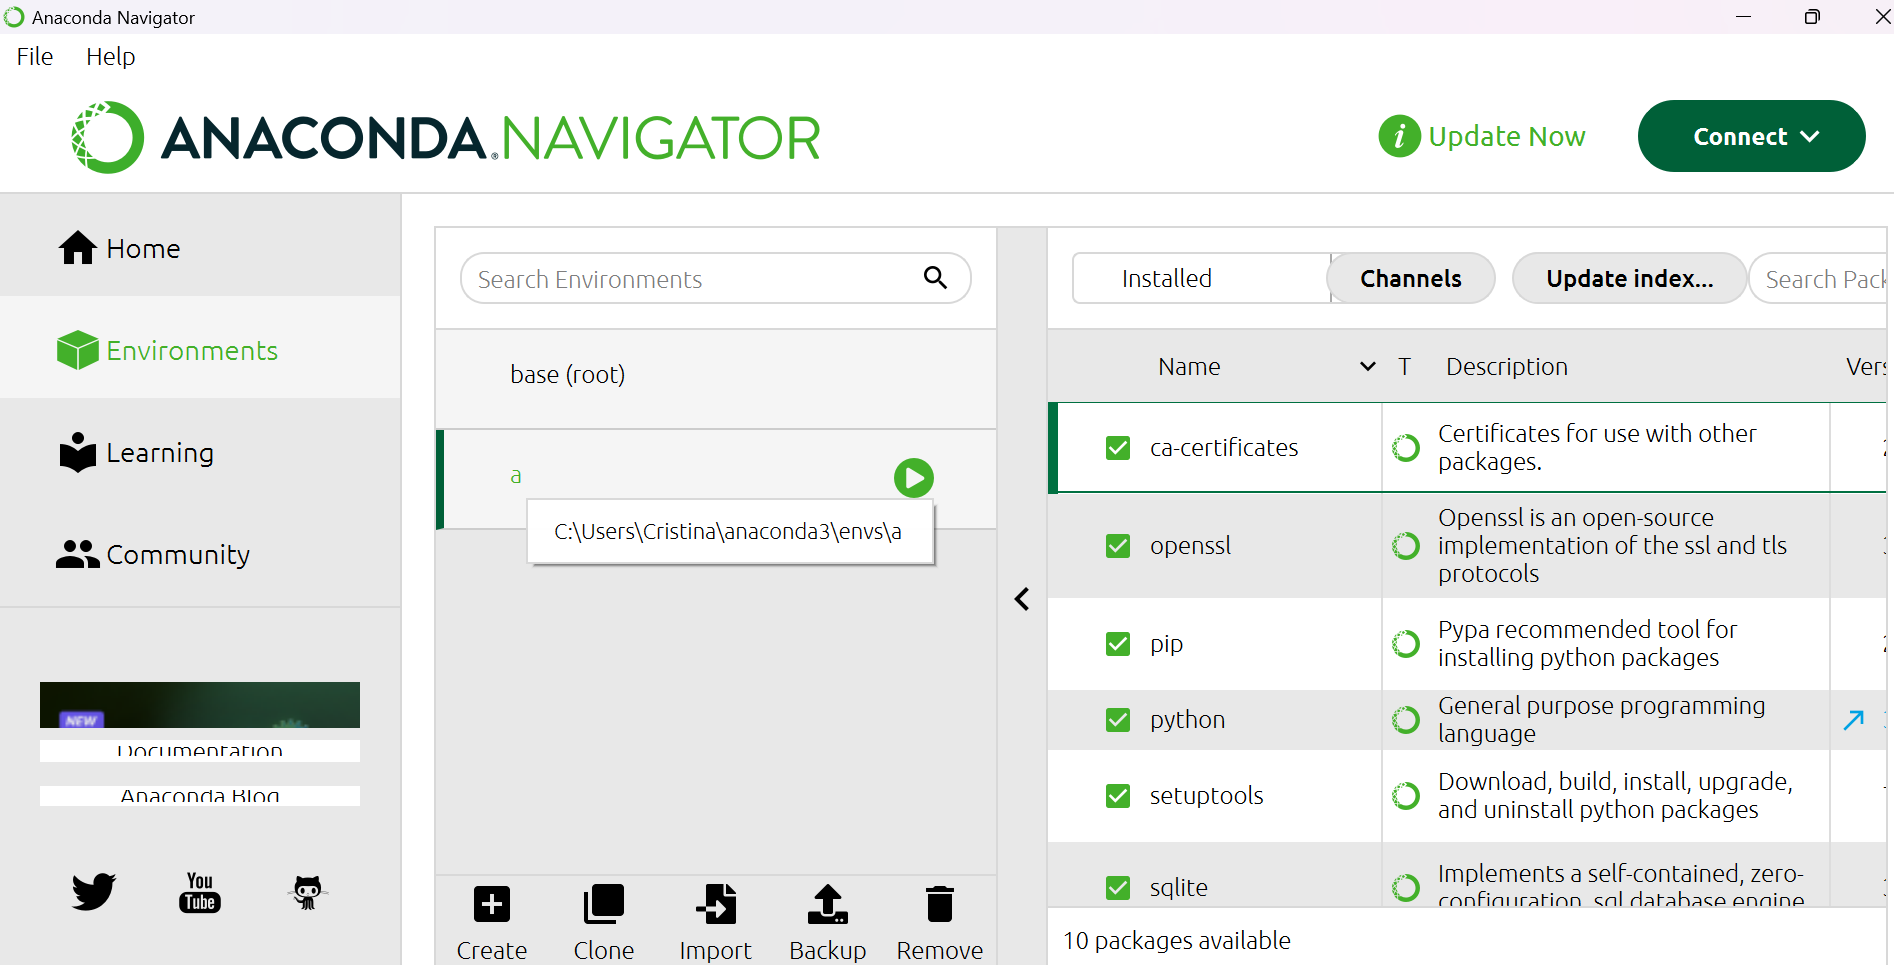

> 3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

In [4]:
!ambiente/bin/python -m pip install numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 113.1 MB/s eta 0:00:00


> 4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

In [5]:
!pip freeze > requirements.txt

In [6]:
!pip freeze

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.3
aiohttp==3.10.10
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.6
astropy-iers-data==0.2024.11.11.0.32.38
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.25.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.1
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==

> 5. Tire um printscreen do ambiente que será usado rodando em sua máquina

In [7]:
!ambiente/bin/python -c "import sys; print(sys.executable)"


/content/ambiente/bin/python


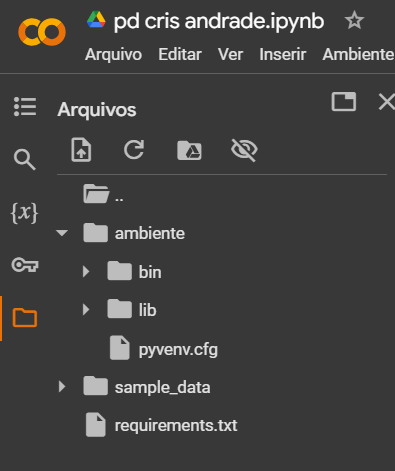

> 6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

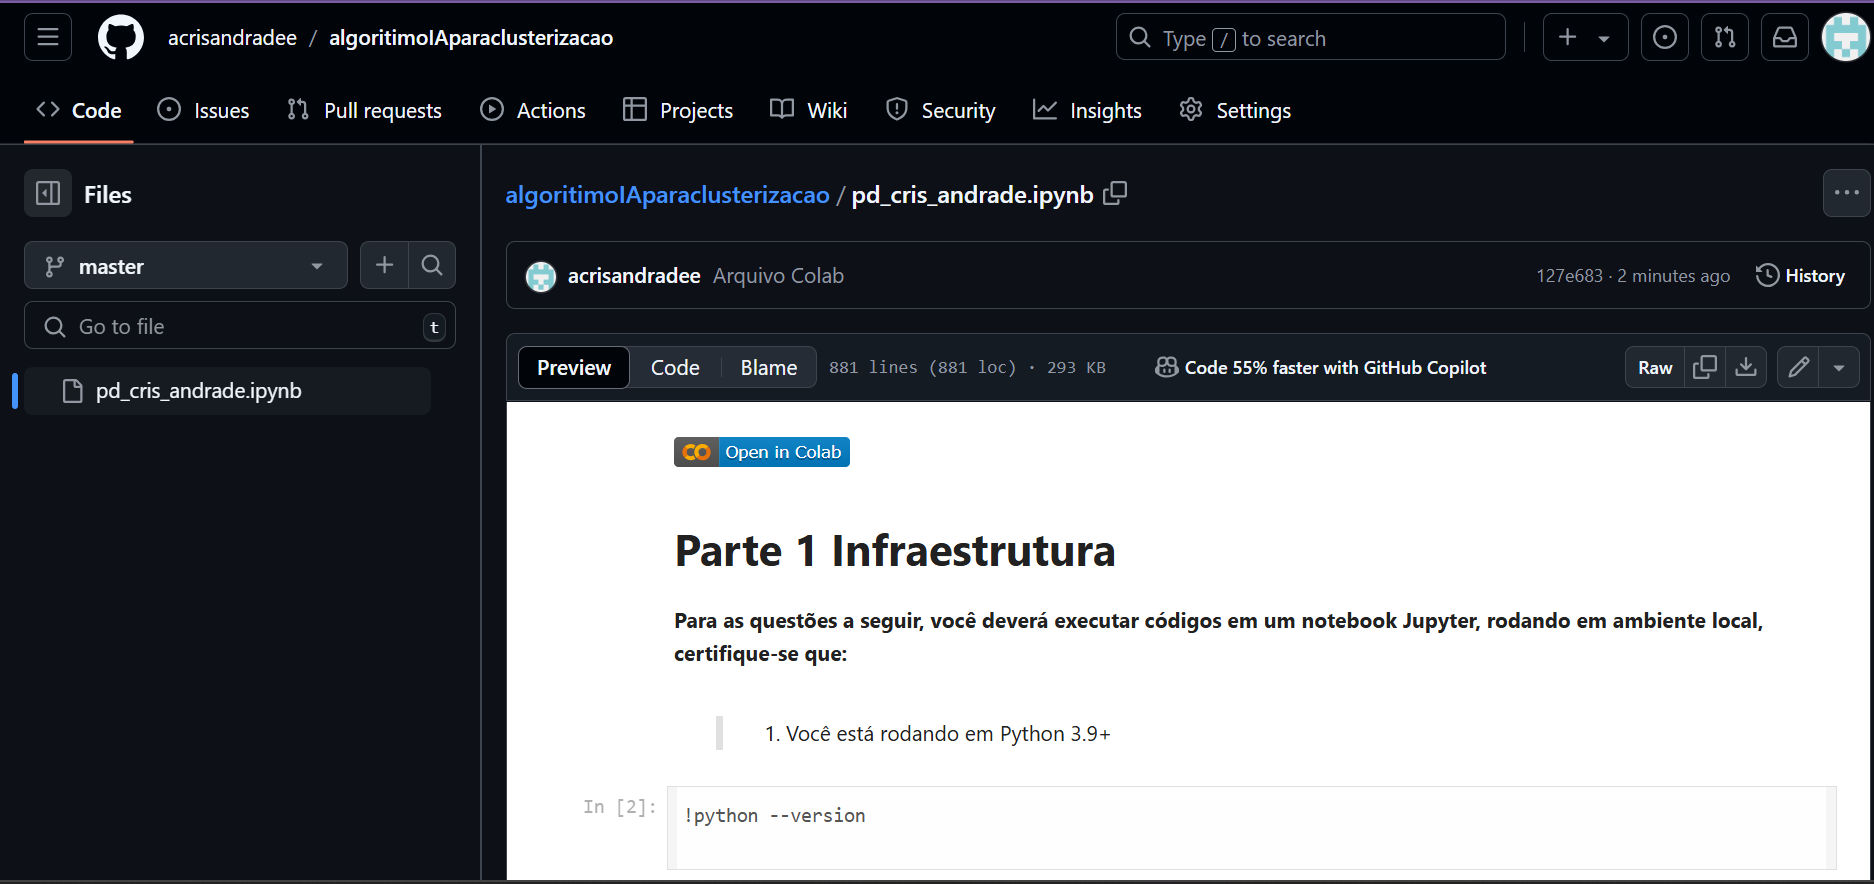

# **Link repositorio: https://github.com/acrisandradee/algoritimoIAparaclusterizacao/blob/master/pd_cris_andrade.ipynb**



---



# **Parte 2  Escolha de base de dados**




**Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.**

> 1. Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

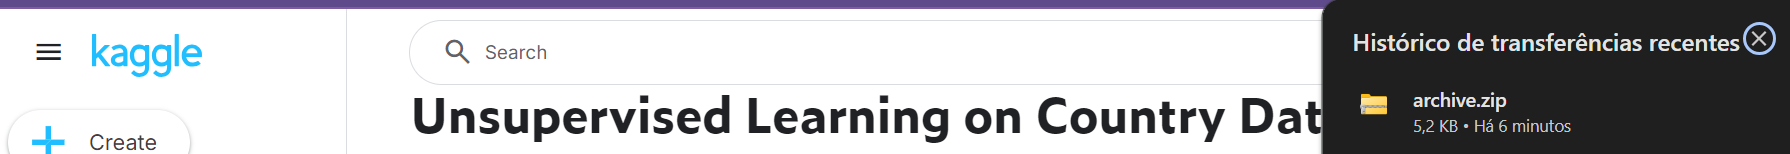

In [8]:
import pandas as pd
data = '/content/drive/MyDrive/pd_algoritimoIAparaclusterizacao/archive/Country-data.csv'
dados = pd.read_csv(data)

dados.isnull().sum()
dados.info
print(dados)
#Carregando os dados

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49   

> 2. Quantos países existem no dataset?

In [9]:
total_paises = dados['country'].nunique()
print(f'O total de países e: {total_paises}')


O total de países e: 167


> 3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

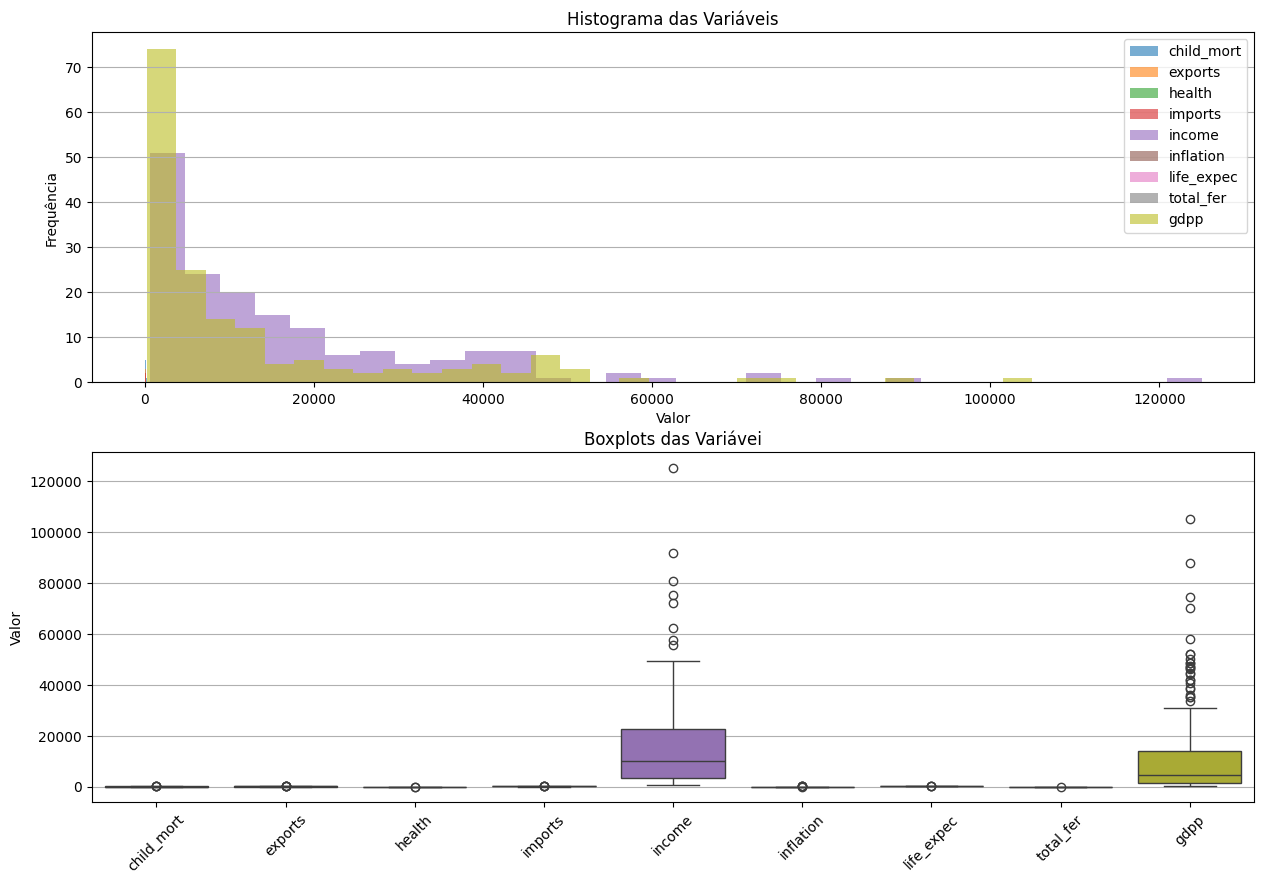

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

variaveis = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=(15, 10))

# Histograma das variáveis
plt.subplot(2, 1, 1)
for var in variaveis:
    plt.hist(dados[var], bins=30, alpha=0.6, label=var)
plt.title('Histograma das Variáveis')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y')

# Boxplot das variáveis
plt.subplot(2, 1, 2)
sns.boxplot(data=dados[variaveis])
plt.title('Boxplots das Variávei')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


Vamos analisar o boxplot de cada variavel

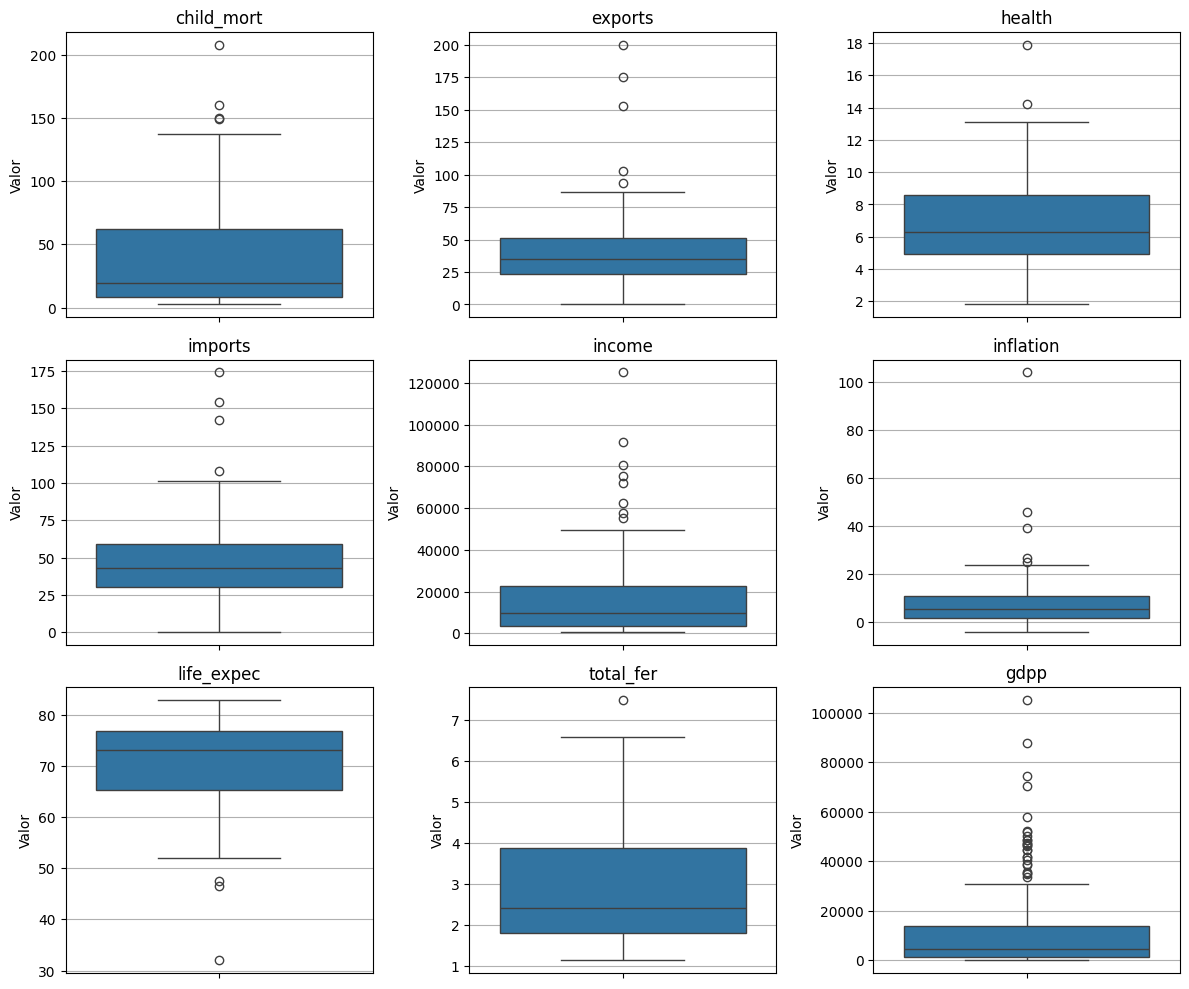

In [11]:
plt.figure(figsize=(12, 10))

# Criando um boxplot para cada variável
for i, var in enumerate(variaveis, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=dados, y=var)
    plt.title(var)
    plt.ylabel('Valor')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

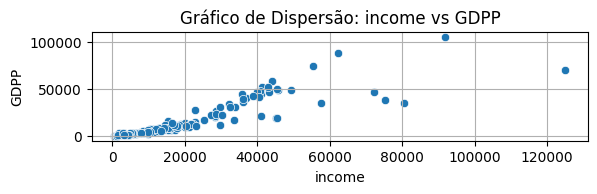

In [12]:
plt.subplot(3, 1, 3)
sns.scatterplot(data=dados, x='income', y='gdpp')
plt.title('Gráfico de Dispersão: income vs GDPP')
plt.xlabel('income')
plt.ylabel('GDPP')
plt.grid()

>Nos gráficos, dá para ver que a maioria das variáveis tem valores baixos, porem algumas apresentam valores bem altos, mostrando uma distribuição desigual e a presença de outliers. O boxplot confirma isso, especialmente para variaveis"income" e "gdp", que têm valores bem fora da média.Optei por não remover nada mesmo com outlier pois, em alguns casos, eles podem representar informações importantes e características específicas dos dados tipo em variáveis econômicas, financeiras ou sociais, onde valores extremos podem indicar particularidades relevantes, como países com economias muito diferentes.Em vez de descartar esses dados, aplicamos a padronizacao.

> 4. Realize o pré-processamento adequado dos dados.

In [13]:
from sklearn.preprocessing import StandardScaler

variaveis = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Padronizar os dados
scaler = StandardScaler()
numerical_data = dados[variaveis]
dadospadronizados = scaler.fit_transform(numerical_data)
dadospadronizados

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])



>





---



# **Parte 3 Clusterização**

**Para os dados pré-processados da etapa anterior você irá:**

> 1. Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:

*a. K-Médias*

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dadospadronizados)
dados['Ncluster'] = kmeans.predict(dadospadronizados)
dados

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Ncluster,Hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,1


*b. Clusterização Hierárquica*

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
Hcluster = cluster.fit_predict(dadospadronizados)
dados['Hcluster'] = Hcluster
dados




,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Ncluster,Hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,1


> 2. Para os resultados, do K-Médias:

a*. Interprete cada um dos clusters obtidos citando:*


I. Qual a distribuição das dimensões em cada grupo


In [32]:
dados_numericos = dados.drop(columns=['country'])

# Agrupar os dados pelos clusters
cluster_0 = dados_numericos[dados['Ncluster'] == 0]
cluster_1 = dados_numericos[dados['Ncluster'] == 1]
cluster_2 = dados_numericos[dados['Ncluster'] == 2]

# Calcular as médias das variáveis para cada cluster
cluster_0_means = cluster_0.mean()
cluster_1_means = cluster_1.mean()
cluster_2_means = cluster_2.mean()

# Exibir as médias dos clusters
print("Médias do Cluster 0:\n", cluster_0_means)
print("============================================")
print("\nMédias do Cluster 1:\n", cluster_1_means)
print("============================================")
print("\nMédias do Cluster 2:\n", cluster_2_means)

Médias do Cluster 0:
 child_mort       22.456977
exports          40.273128
health            6.251047
imports          47.362394
income        12321.744186
inflation         7.720884
life_expec       72.566279
total_fer         2.340349
gdpp           6461.767442
Ncluster          0.000000
Hcluster          0.965116
dtype: float64

Médias do Cluster 1:
 child_mort        5.000000
exports          58.738889
health            8.807778
imports          51.491667
income        45672.222222
inflation         2.671250
life_expec       80.127778
total_fer         1.752778
gdpp          42494.444444
Ncluster          1.000000
Hcluster          0.138889
dtype: float64

Médias do Cluster 2:
 child_mort      95.106667
exports         28.602444
health           6.301111
imports         42.306667
income        3539.844444
inflation       11.986778
life_expec      59.055556
total_fer        5.065333
gdpp          1766.711111
Ncluster         2.000000
Hcluster         1.600000
dtype: float64


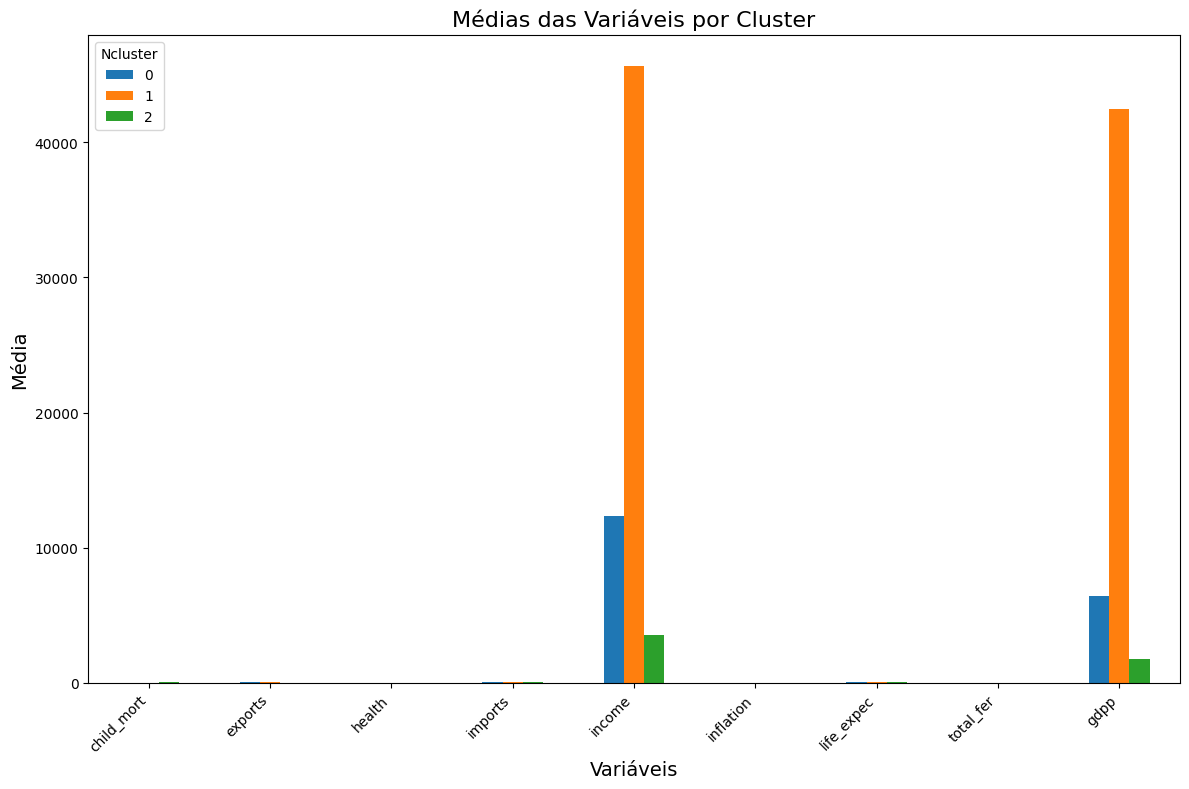

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


cluster_means = dados.groupby('Ncluster')[['child_mort', 'exports', 'health', 'imports', 'income',
                                      'inflation', 'life_expec', 'total_fer', 'gdpp']].mean()

# Plotando o gráfico de barras
cluster_means.T.plot(kind='bar', figsize=(12, 8))

# Adicionando título e rótulos
plt.title('Médias das Variáveis por Cluster', fontsize=16)
plt.ylabel('Média', fontsize=14)
plt.xlabel('Variáveis', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Resposta:

Os paises foram agrupados em tres clusters distintos onde cada cluster reflete caracteristicas socioeconomicas especificas.


O Cluster 0 representa países com indicadores intermediários, como mortalidade infantil moderada, renda média e uma expectativa de vida razoável, além de exportações e importações equilibradas.

 Já o Cluster 1 inclui países desenvolvidos, que se destacam por alta expectativa de vida, baixa mortalidade infantil, alta renda per capita e economia mais estável, com baixa inflação.

 Por outro lado, o Cluster 2 reúne países subdesenvolvidos, caracterizados por alta mortalidade infantil, baixa expectativa de vida e renda per capita, e taxas de fertilidade bem maiores. As médias das variáveis nos clusters mostram claramente essas diferenças, destacando as desigualdades entre os grupos. Essa análise ajuda a entender melhor as condições econômicas e sociais dos países de cada grupo.


In [26]:
import matplotlib.pyplot as plt

cluster_0_means = cluster_0.mean().drop(labels=['Ncluster', 'Hcluster'])
cluster_1_means = cluster_1.mean().drop(labels=['Ncluster', 'Hcluster'])
cluster_2_means = cluster_2.mean().drop(labels=['Ncluster', 'Hcluster'])

def plot_cluster_means(cluster_means, cluster_label):
    plt.figure(figsize=(10, 6))
    cluster_means.plot(kind='bar', color='skyblue', alpha=0.8, edgecolor='black')
    plt.title(f"Distribuição das Dimensões - {cluster_label}", fontsize=14)
    plt.ylabel("Média", fontsize=12)
    plt.xlabel("Dimensões", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


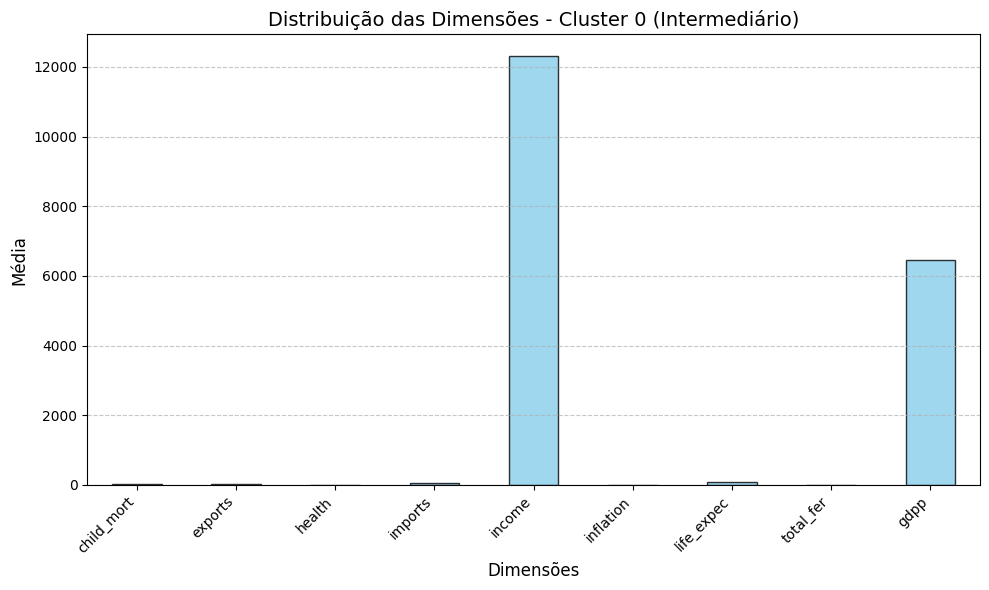

In [27]:

plot_cluster_means(cluster_0_means, "Cluster 0 (Intermediário)")


O gráfico do cluster 0 mostra indicadores médios, como income e gdpp que são moderados em comparação aos outros clusters. Além disso life_expec e child_mort estão em níveis intermediários.

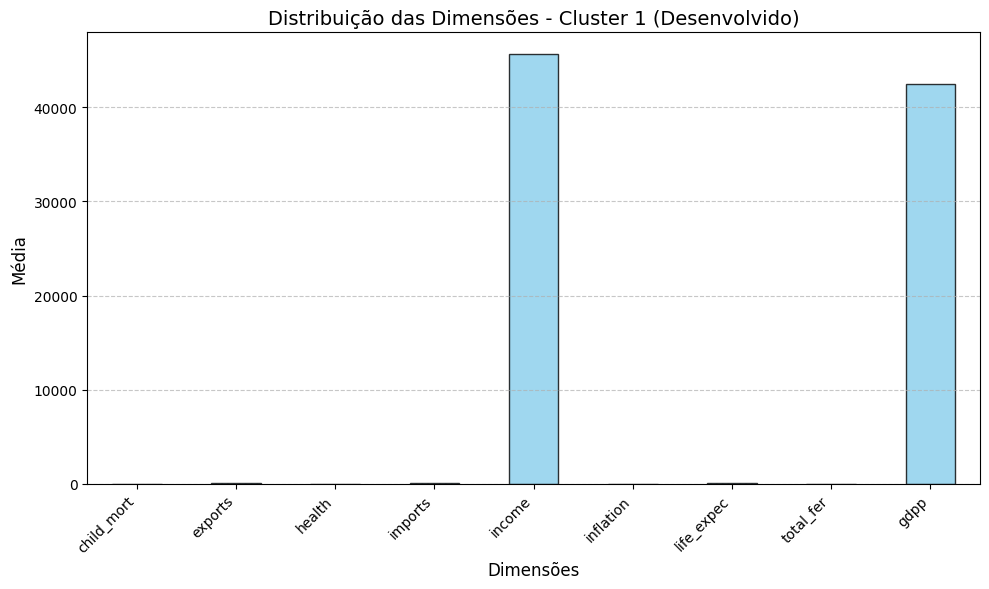

In [28]:
plot_cluster_means(cluster_1_means, "Cluster 1 (Desenvolvido)")


 Ja o cluster 1 observa-se altos valores para renda per capita e PIB com baixa mortalidade infantil e alta expectativa de vida, confirmando que este grupo representa países desenvolvidos .



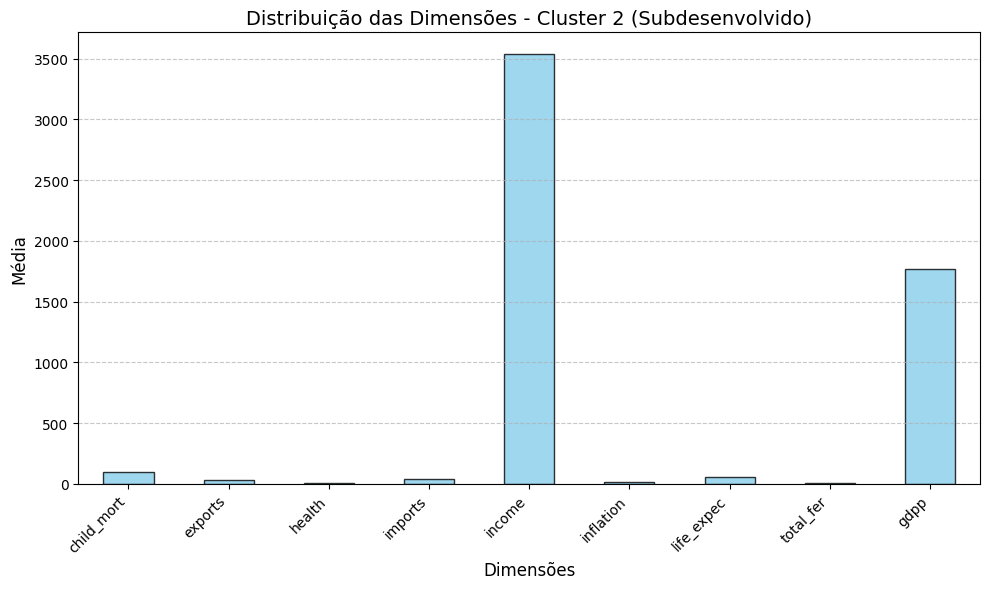

In [29]:
plot_cluster_means(cluster_2_means, "Cluster 2 (Subdesenvolvido)")

os gráficos do cluster 2 mostram baixíssimos níveis de renda per capita e PIB juntamente com alta mortalidade infantil e baixa expectativa de vida, indicando condições de países subdesenvolvidos.

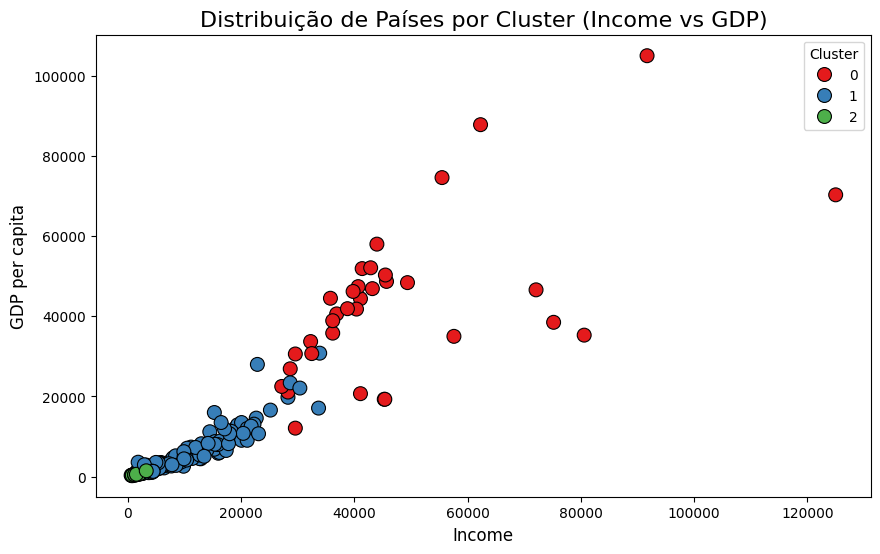

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=dados['income'], y=dados['gdpp'], hue=dados['Hcluster'], palette='Set1', s=100, edgecolor='black')

plt.title('Distribuição de Países por Cluster (Income vs GDP)', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('GDP per capita', fontsize=12)

plt.legend(title='Cluster')
plt.show()


II. O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique


In [65]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances


centroides = kmeans.cluster_centers_
distancias = pairwise_distances(dadospadronizados, centroides)

representantes = []
for cluster in range(len(centroides)):
    indices_cluster = dados[dados['Ncluster'] == cluster].index
    distancias_cluster = distancias[indices_cluster, cluster]
    representante = indices_cluster[np.argmin(distancias_cluster)]
    representantes.append(representante)
paises_representativos = dados.loc[representantes]

paises_representativos['Cluster'] = paises_representativos['Ncluster']

colunas_interesse = ['country', 'child_mort', 'exports', 'health', 'income', 'life_expec','gdpp', 'Ncluster']
resultado = paises_representativos[colunas_interesse]

print("Países que melhor representam cada agrupamento:")
print(resultado)


Países que melhor representam cada agrupamento:
      country  child_mort  exports  health  income  life_expec   gdpp  \
143  Suriname        24.1     52.5    7.01   14200        70.3   8300   
68    Iceland         2.6     53.4    9.40   38800        82.0  41900   
63     Guinea       109.0     30.3    4.93    1190        58.0    648   

     Ncluster  
143         0  
68          1  
63          2  


Pela expectativa de vida

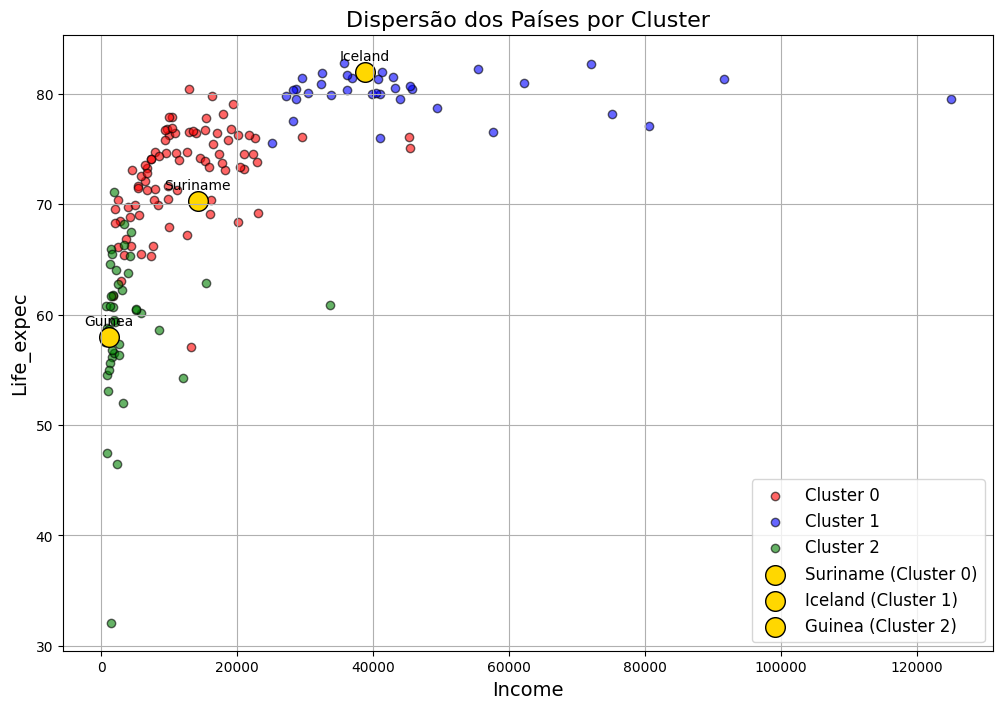

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

x_var = "income"
y_var = "life_expec"

plt.figure(figsize=(12, 8))

colors = ['red', 'blue', 'green']

for cluster in range(len(centroides)):
    cluster_data = dados[dados['Ncluster'] == cluster]
    plt.scatter(
        cluster_data[x_var],
        cluster_data[y_var],
        label=f'Cluster {cluster}',
        alpha=0.6,
        edgecolor='k',
        color=colors[cluster]
    )
for i, row in paises_representativos.iterrows():
    plt.scatter(
        row[x_var], row[y_var],
        color='gold', edgecolor='black',
        s=200, label=f'{row["country"]} (Cluster {row["Ncluster"]})'
    )
    plt.text(row[x_var], row[y_var] + 1, row["country"], fontsize=10, ha='center')
plt.title('Dispersão dos Países por Cluster', fontsize=16)
plt.xlabel(x_var.capitalize(), fontsize=14)
plt.ylabel(y_var.capitalize(), fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


Para verificarmos o pais mais proximo do centroid, vamos calcular a menor distancia

In [92]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances

distanciastotal = pairwise_distances(dadospadronizados, centroides, metric='euclidean')

distancias_somadas = distanciastotal.sum(axis=1)

indiceproximo = np.argmin(distancias_somadas)
dados_distancias = pd.DataFrame({
    'Country': dados['country'],
    'Distância': distancias_somadas
})

dados_distancias = dados_distancias.sort_values(by='Distância')

print("países ordenados pela soma das distâncias centróides:")
print(dados_distancias)

países ordenados pela soma das distâncias centróides:
                Country  Distância
143            Suriname   6.707654
118            Paraguay   7.205815
62            Guatemala   7.319962
45   Dominican Republic   7.395992
48          El Salvador   7.457358
..                  ...        ...
98                Malta  19.934598
123               Qatar  20.955172
133           Singapore  26.968112
91           Luxembourg  27.207073
113             Nigeria  30.222679

[167 rows x 2 columns]


In [91]:

pais_mais_proximo = dados.iloc[indiceproximo]

print(f"O país mais próximo de todos os centróides é:")
print(pais_mais_proximo)


O país mais próximo de todos os centróides é:
country       Suriname
child_mort        24.1
exports           52.5
health            7.01
imports           38.4
income           14200
inflation          7.2
life_expec        70.3
total_fer         2.52
gdpp              8300
Ncluster             0
Hcluster             1
Name: 143, dtype: object


Justificativa:

O pais mais proximo e aquele cuja a soma das distancias foi a menor possivel. ou seja ele esta mais proximo dos grupos formados pelos centroids em relacao aos cluesters

> 3. Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

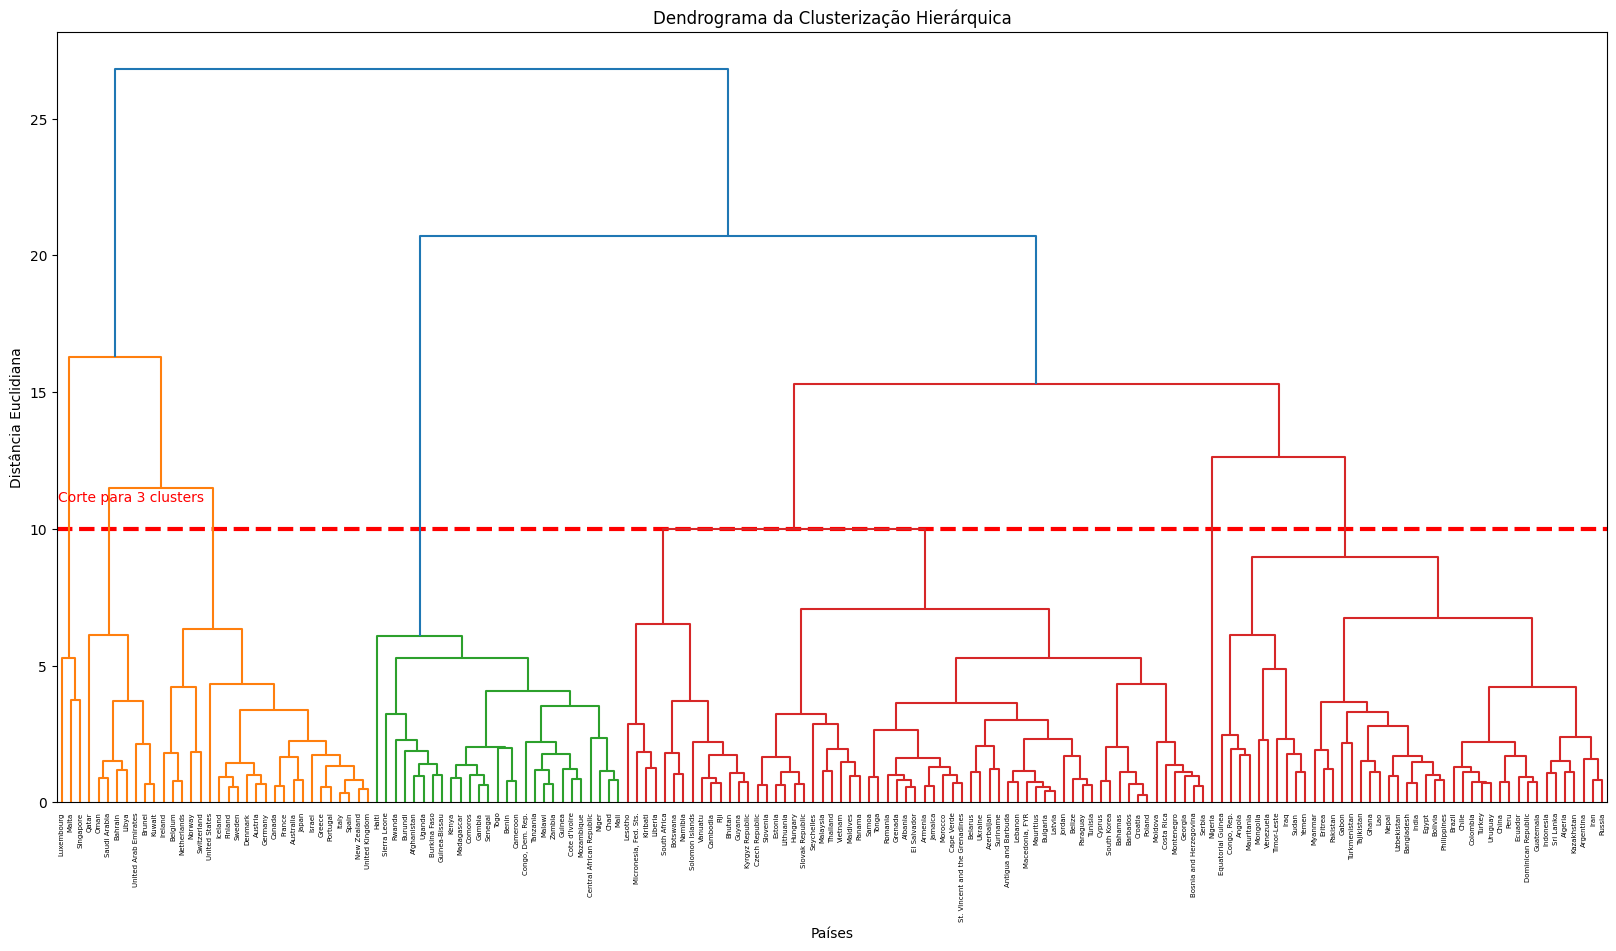

In [127]:

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

Z = sch.linkage(dadospadronizados, method='ward')

# Plotando o dendrograma com melhorias
plt.figure(figsize=(20, 10))
plt.title('Dendrograma da Clusterização Hierárquica')
plt.xlabel('Países')
plt.ylabel('Distância Euclidiana')


plt.hlines(y=10, xmin=0, xmax=2000, lw=3, linestyles='--', color='red')
plt.text(x=0.9, y=11, s='Corte para 3 clusters', fontsize=10, color='red')
sch.dendrogram(Z, labels=dados['country'].values, leaf_rotation=90, leaf_font_size=5)
plt.show()


> 4. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

In [ ]:
dados['Cluster'] = kmeans.labels_

print("Quantidade de países em cada cluster:")
print(dados['Cluster'].value_counts())

plt.figure(figsize=(10, 6))
plt.scatter(dados_padronizados_df['income'], dados_padronizados_df['gdpp'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Income (Padronizado)')
plt.ylabel('GDP (Padronizado)')
plt.title('Agrupamento de Países usando K-Médias (K=3)')
plt.colorbar(label='Cluster')
plt.show()

*b. Clusterização Hierárquica*